**Rwanda CropLand Classification**


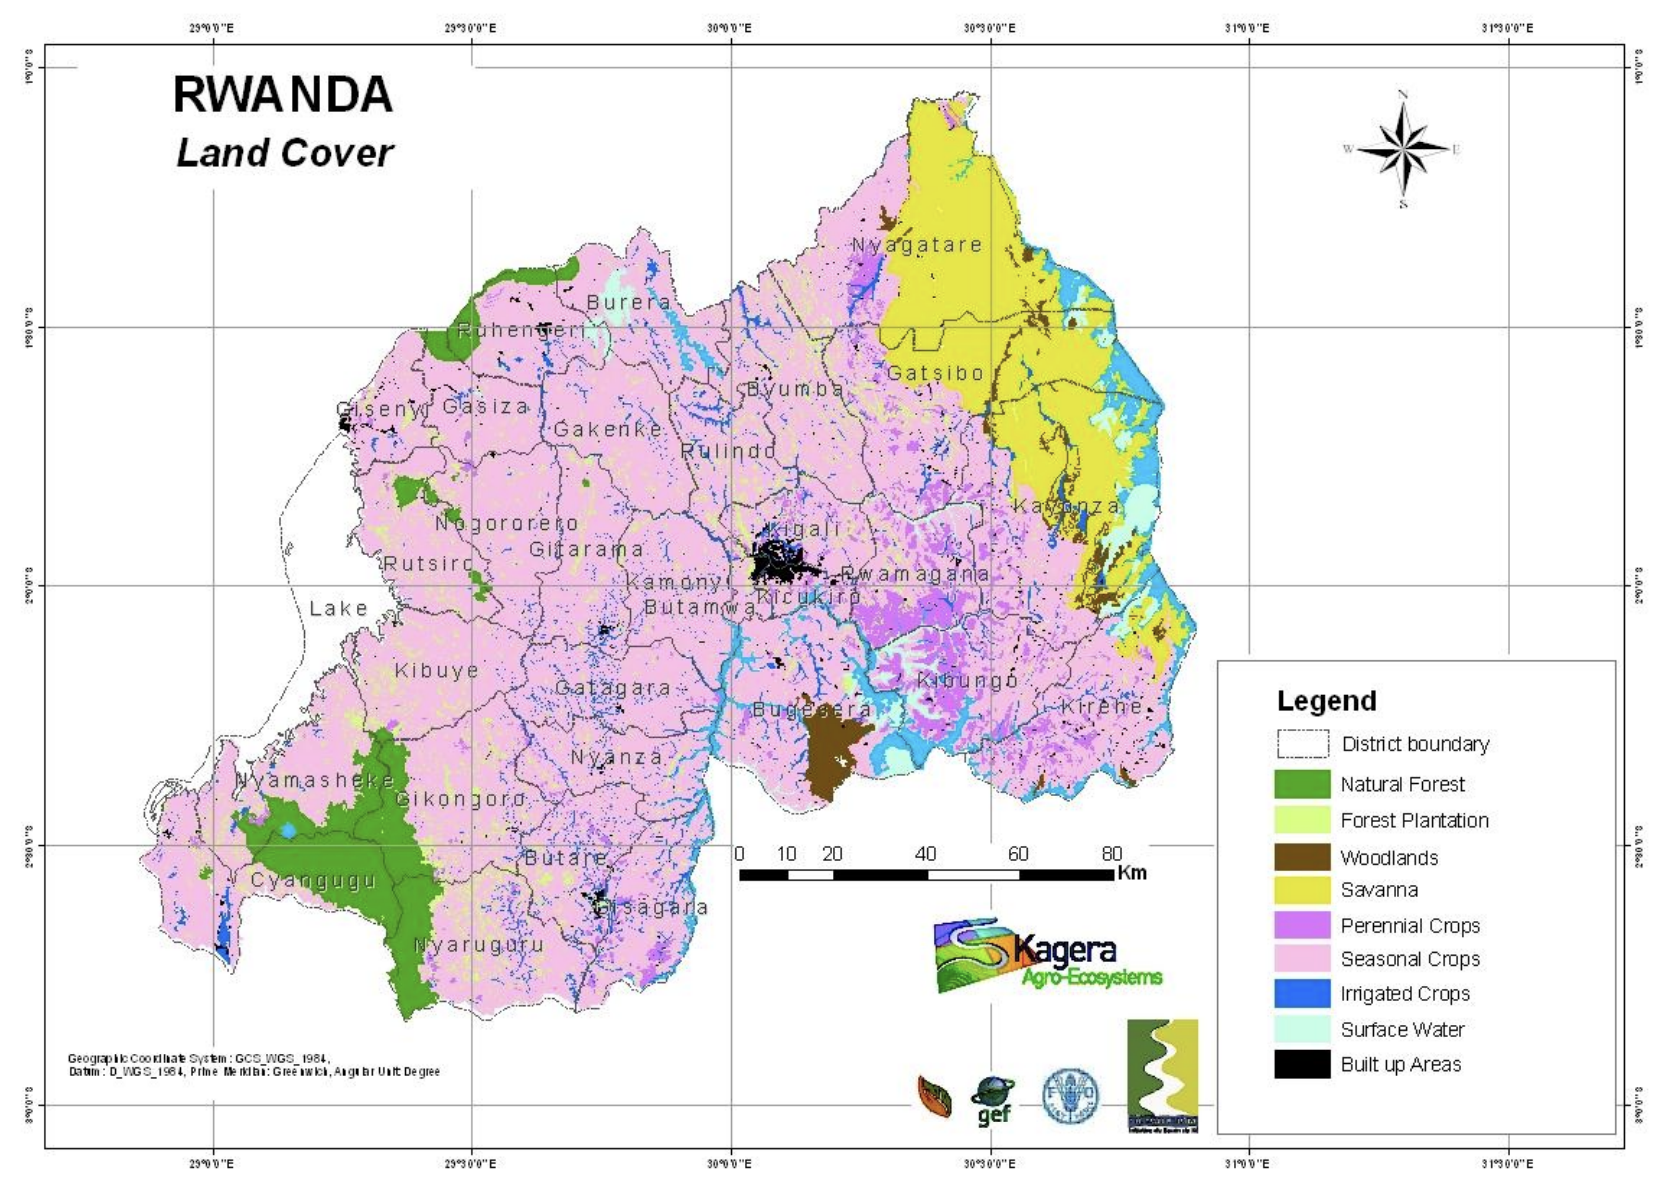

**Author:** [Ibrahim Salihu Yusuf](https://www.linkedin.com/in/ibrahim-salihu-yusuf-721103100/)  
**Email:** i.yusuf@instadeep.com  
**Date:** 20-06-2024

Apache License 2.0.


In this part, we will use multispectral data from [Harmonized Landsat and Sentinel](https://hls.gsfc.nasa.gov/) (HLS) to classify croplands in Rwanda.



In [1]:
!gsutil -m cp -r 'instageo/data/ML4EO IndabaX Rwanda Data' .

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("ML4EO IndabaX Rwanda Data/data/ed0ab379-a688-4419-ab96-181c726e1b22.csv")
df2 = pd.read_csv("ML4EO IndabaX Rwanda Data/data/0cfc1320-f909-4759-90f9-cb5c92ca019e.csv")
df3 = pd.read_csv("ML4EO IndabaX Rwanda Data/data/ceo-2019-rwanda-cropland-rcmrd-set-2-sample-data-2021-04-20.csv")

In [3]:
df1.head()

,_id,plot_id,sample_id,lon,lat,flagged,collection_time,analysis_duration,imagery_title,imagery_attributions,sample_geom,Crop/ or not,Confidence level
0,1,139241384,540531505,29.220932,-0.867936,False,2021-03-06T18:12:00,63.7 secs,Mapbox Satellite,NaN,POINT(29.220931912 -0.867935506),Cropland,somewhat confident
1,2,139241385,540531506,30.901432,-1.497424,False,2021-03-06T18:13:00,11.4 secs,Mapbox Satellite,NaN,POINT(30.901431821 -1.497424228),Non-crop,fairly confident
2,3,139241386,540531507,28.537325,-1.759318,False,2021-03-06T18:13:00,8.0 secs,Mapbox Satellite,NaN,POINT(28.537324894 -1.759318017),Non-crop,completely confident
3,4,139241387,540531508,29.167310,-2.235693,False,2021-03-06T18:13:00,8.0 secs,Mapbox Satellite,NaN,POINT(29.167310239 -2.235693169),Non-crop,completely confident
4,5,139241388,540531509,28.957315,-1.128458,False,2021-03-06T18:14:00,63.9 secs,Mapbox Satellite,NaN,POINT(28.957315124 -1.128458256),Cropland,fairly confident


In [4]:
df2.head()

,_id,plot_id,sample_id,lon,lat,flagged,collection_time,analysis_duration,imagery_title,imagery_attributions,sample_geom,Crop/ or not
0,1,139457944,543841471,29.220932,-0.867936,False,2021-04-13T08:57:00,12.9 secs,Mapbox Satellite,NaN,POINT(29.220931912 -0.867935506),Non-crop
1,2,139457945,543841472,30.901432,-1.497424,False,2021-04-13T09:39:00,21.8 secs,Mapbox Satellite,NaN,POINT(30.901431821 -1.497424228),Non-crop
2,3,139457946,543841473,28.537325,-1.759318,False,2021-04-13T09:43:00,5.5 secs,Mapbox Satellite,NaN,POINT(28.537324894 -1.759318017),Non-crop
3,4,139457947,543841474,29.167310,-2.235693,False,2021-04-13T09:43:00,6.1 secs,Mapbox Satellite,NaN,POINT(29.167310239 -2.235693169),Non-crop
4,5,139457948,543841476,28.957315,-1.128458,False,2021-04-13T09:44:00,43.5 secs,Mapbox Satellite,NaN,POINT(28.957315124 -1.128458256),Cropland


In [5]:
df3.head()

,plot_id,sample_id,lon,lat,flagged,collection_time,analysis_duration,imagery_title,imagery_attributions,sample_geom,Crop/ or not
0,139459144,543839977,29.220932,-0.867936,False,2021-04-13 5:41,11.0 secs,Mapbox Satellite,NaN,POINT(29.220931912 -0.867935506),Non-crop
1,139459145,543839978,30.901432,-1.497424,False,2021-04-13 5:41,6.1 secs,Mapbox Satellite,NaN,POINT(30.901431821 -1.497424228),Non-crop
2,139459146,543839979,28.537325,-1.759318,False,2021-04-13 5:41,5.3 secs,Mapbox Satellite,NaN,POINT(28.537324894 -1.759318017),Non-crop
3,139459147,543839980,29.167310,-2.235693,False,2021-04-13 5:41,4.6 secs,Mapbox Satellite,NaN,POINT(29.167310239 -2.235693169),Non-crop
4,139459148,543839981,28.957315,-1.128458,False,2021-04-13 5:41,18.2 secs,Mapbox Satellite,NaN,POINT(28.957315124 -1.128458256),Non-crop


In [6]:
df = pd.concat([df1, df2, df3])

In [7]:
df = df[['lat', 'lon', 'collection_time', 'Crop/ or not', 'sample_id']]
df = df.rename({"lon": "x", "lat":"y", "Crop/ or not":'label', 'collection_time':"date"}, axis=1)
df.head(10)

,y,x,date,label,sample_id
0,-0.867936,29.220932,2021-03-06T18:12:00,Cropland,540531505
1,-1.497424,30.901432,2021-03-06T18:13:00,Non-crop,540531506
2,-1.759318,28.537325,2021-03-06T18:13:00,Non-crop,540531507
3,-2.235693,29.167310,2021-03-06T18:13:00,Non-crop,540531508
4,-1.128458,28.957315,2021-03-06T18:14:00,Cropland,540531509
5,-1.186380,28.539301,2021-03-06T18:14:00,Non-crop,540531510
6,-1.339662,29.692388,2021-03-06T18:15:00,Cropland,540531511
7,-1.758779,30.900893,2021-03-06T18:16:00,Non-crop,540531512
8,-2.915554,29.593948,2021-03-06T18:16:00,Non-crop,540531513
9,-1.398118,29.908671,2021-03-06T18:16:00,Cropland,540531514


In [8]:
df.shape

(3609, 5)

In [9]:
def label_map(x):
    if x == "Cropland":
        return 1
    elif x == "Non-crop":
        return 0
    else:
        return np.nan

In [10]:
df['date'] = df['date'].map(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))
df['label'] = df['label'].map(label_map)
df = df.dropna().reset_index()
df.head(10)

,index,y,x,date,label,sample_id
0,0,-0.867936,29.220932,2021-03-06,1.0,540531505
1,1,-1.497424,30.901432,2021-03-06,0.0,540531506
2,2,-1.759318,28.537325,2021-03-06,0.0,540531507
3,3,-2.235693,29.167310,2021-03-06,0.0,540531508
4,4,-1.128458,28.957315,2021-03-06,1.0,540531509
5,5,-1.186380,28.539301,2021-03-06,0.0,540531510
6,6,-1.339662,29.692388,2021-03-06,1.0,540531511
7,7,-1.758779,30.900893,2021-03-06,0.0,540531512
8,8,-2.915554,29.593948,2021-03-06,0.0,540531513
9,9,-1.398118,29.908671,2021-03-06,1.0,540531514


In [11]:
df.to_csv("rwanda_cropland_data.csv")

In [12]:
# python -m "instageo.data.chip_creator" \
#     --dataframe_path="rwanda_cropland_data.csv" \
#     --output_directory="ML4EO IndabaX Rwanda Data" \
#     --min_count=1 \
#     --no_data_value=-1 \
#     --temporal_tolerance=3 \
#     --temporal_step=30 \
#     --num_steps=1 \
#     --download_only

In [12]:
# !pip install rasterio "xarray[complete]" rioxarray

In [13]:
import rioxarray
import xarray as xr
import rasterio
import json
import geopandas as gpd

In [14]:
def open_mf_tiff_dataset(band_files: dict[str, dict[str, str]]):
    """Open multiple TIFF files as an xarray Dataset.

    Args:
        band_files (Dict[str, Dict[str, str]]): A dictionary mapping band names to file paths.
        mask_cloud (bool): Perform cloud masking.

    Returns:
        (xr.Dataset, CRS): A tuple of xarray Dataset combining data from all the
            provided TIFF files and its CRS
    """
    band_paths = list(band_files["tiles"].values())
    bands_dataset = xr.open_mfdataset(
        band_paths,
        concat_dim="band",
        combine="nested",
    )
    with rasterio.open(band_paths[0]) as src:
        crs = src.crs
    return bands_dataset, crs

In [15]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.x, df.y, crs="EPSG:4326")
)
gdf.head(10)

,index,y,x,date,label,sample_id,geometry
0,0,-0.867936,29.220932,2021-03-06,1.0,540531505,POINT (29.22093 -0.86794)
1,1,-1.497424,30.901432,2021-03-06,0.0,540531506,POINT (30.90143 -1.49742)
2,2,-1.759318,28.537325,2021-03-06,0.0,540531507,POINT (28.53732 -1.75932)
3,3,-2.235693,29.167310,2021-03-06,0.0,540531508,POINT (29.16731 -2.23569)
4,4,-1.128458,28.957315,2021-03-06,1.0,540531509,POINT (28.95732 -1.12846)
5,5,-1.186380,28.539301,2021-03-06,0.0,540531510,POINT (28.53930 -1.18638)
6,6,-1.339662,29.692388,2021-03-06,1.0,540531511,POINT (29.69239 -1.33966)
7,7,-1.758779,30.900893,2021-03-06,0.0,540531512,POINT (30.90089 -1.75878)
8,8,-2.915554,29.593948,2021-03-06,0.0,540531513,POINT (29.59395 -2.91555)
9,9,-1.398118,29.908671,2021-03-06,1.0,540531514,POINT (29.90867 -1.39812)


In [16]:
gdf['label'].value_counts()

label
0.0    2326
1.0    1263
Name: count, dtype: int64

In [20]:
with open("ML4EO IndabaX Rwanda Data/hls_dataset.json") as json_file:
    hls_dataset = json.load(json_file)

In [21]:
tolerance = 30*2

dfs = []
for _, hls_tile_dict in hls_dataset.items():
    ds, crs = open_mf_tiff_dataset(hls_tile_dict)
    new_gdf = gdf.to_crs(crs=crs)

    x_coords = xr.DataArray(new_gdf.geometry.x, dims="z")
    y_coords = xr.DataArray(new_gdf.geometry.y, dims="z")
    ids = xr.DataArray(new_gdf.sample_id, dims="z")
    label = xr.DataArray(new_gdf.label, dims="z")

    dataset = ds.sel(
        y=y_coords,
        x=x_coords,
        method='nearest',
    )
    valid_lon = abs(dataset.x - x_coords) <= tolerance
    valid_lat = abs(dataset.y - y_coords) <= tolerance
    dataset = dataset.where(valid_lon & valid_lat, other=np.nan)
    dataset['band'] = range(6)

    result = xr.Dataset({
        'id': ids,
        'label': label,
        'band': dataset['band'],
        'band_data': dataset['band_data']

    })
    ddf = result.to_dataframe()
    ddf = ddf.drop(columns=['spatial_ref']).pivot_table(index=['x', 'y', 'z', 'id', 'label'], columns='band', values='band_data').dropna()
    ddf.columns = [f'band_{col}' for col in ddf.columns]
    dfs.append(ddf)

In [22]:
all_df = pd.concat(dfs)
all_df = all_df.reset_index()

In [23]:
final_df = all_df.dropna(how='any').drop_duplicates(subset=['id'])
final_df


,x,y,z,id,label,band_0,band_1,band_2,band_3,band_4,band_5
0,700485.0,-90285.0,1070,540573962,0.0,0.0707,0.0913,0.1018,0.2556,0.1298,0.0920
1,700485.0,-90285.0,2270,547811330,0.0,0.0707,0.0913,0.1018,0.2556,0.1298,0.0920
2,700485.0,-90285.0,3462,547800092,0.0,0.0707,0.0913,0.1018,0.2556,0.1298,0.0920
3,700575.0,-101835.0,159,540532466,0.0,0.3689,0.3926,0.3944,0.5018,0.3225,0.2489
4,700575.0,-101835.0,1356,543847616,0.0,0.3689,0.3926,0.3944,0.5018,0.3225,0.2489
...,...,...,...,...,...,...,...,...,...,...,...
8437,694365.0,-322275.0,2129,547809146,1.0,0.0223,0.0597,0.0482,0.3223,0.2099,0.1148
8438,694365.0,-322275.0,3321,547703000,1.0,0.0223,0.0597,0.0482,0.3223,0.2099,0.1148
8442,694815.0,-317115.0,145,540532452,1.0,0.0217,0.0435,0.0339,0.2460,0.1432,0.0689
8443,694815.0,-317115.0,1342,543847600,1.0,0.0217,0.0435,0.0339,0.2460,0.1432,0.0689


In [24]:
final_df['label'].value_counts()

label
0.0    2206
1.0    1226
Name: count, dtype: int64

In [25]:
final_df.to_csv("rwanda_cropland_data.csv")

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('rwanda_cropland_data.csv')

num_bands = 6
X = df[[f'band_{col}' for col in range(num_bands)]]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5).astype(int)

# Evaluating the model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc*100:.2f}%")

Accuracy Score: 63.88%


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('rwanda_cropland_data.csv')

num_bands = 6
X = df[[f'band_{col}' for col in range(num_bands)]]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy Score: {acc*100:.2f}%")


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy Score: 66.02%
